# Model Representation in Supervised Learning

To define formally a supervised learning problem a function
$h: X \to Y$ is introduced. This function give a training
set from space of input values $X$ predicts a corresponding
value $y$ from space of output values $Y$. The function is
usually called hypothesis.

## Linear Regression

Linear regression with one variable or univariate linear
regression represents $h$ as:

$$h_{\theta}(x) = \theta_0 + \theta_1 x$$

Or as matrix multiplication:

$$h_{\theta}(X) = X \theta \text{ where }
X = \begin{pmatrix} 1 & x_1\end{pmatrix}
\text{ and } 
\theta = \begin{pmatrix} \theta_0 \\ \theta_1\end{pmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_filename_1 = 'data/ex1data1.txt'
data = np.loadtxt(data_filename_1, delimiter=',')
data.shape

(97, 2)

In [3]:
raw_X = data[:, 0]
y = data[:, 1]

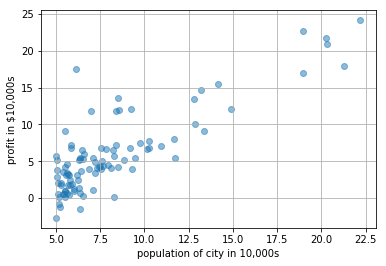

In [4]:
def plot_data(x, y):
    plt.scatter(x, y, alpha=0.5)
    plt.grid()
    plt.xlabel('population of city in 10,000s')
    plt.ylabel('profit in $10,000s')

plot_data(raw_X, y)

In [5]:
X = np.stack((np.ones(raw_X.shape[0]), raw_X), axis=-1)
iterations = 1500
alpha = 0.01

## Cost Function

Cost function measures the accuracy of the hypothesis function. For linear regression:

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}
(h_{\theta}(x_i) - y_i)^2$$

Where $h_{\theta}: X \to Y$ is the hypothesis function.

The goal is to minimize the  cost function:

$$\text{minimize}_{\theta_0, \theta_1} J(\theta_0, \theta_1)$$

In [6]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    return np.sum(np.square(np.dot(X, theta) - y)) / (2 * m)

In [7]:
theta = np.zeros((2,))
compute_cost(X, y, theta)

32.072733877455676

## Gradient Descent

The gradient descent algorithm for linear regression is repeating this step until convergence:

$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial
\theta_j} J(\theta_0, \theta_1) \text{ where } j = 0, 1$$

Concretelly:

$$\theta_0 = \theta_0 - \alpha \frac{1}{m}
\sum_{i = 1}^{m}(h_\theta(x_i) - y_i)$$

$$\theta_1 = \theta_1 - \alpha \frac{1}{m}
\sum_{i = 1}^{m}((h_\theta(x_i) - y_i)x_i)$$

Where $\alpha$ it a learning rate. The $=$ means assigment and these assigments for $\theta_0$
and $\theta_1$ must happend simultaneously.

In [8]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros((iterations))
    for i in range(iterations):
        m = y.shape[0]
        tmp_1 = theta[0] - alpha * np.sum(np.dot(X, theta) - y) / m
        tmp_2 = theta[1] - alpha * np.dot((np.dot(X, theta) - y).T, X[:, 1]) / m
        theta[0], theta[1] = tmp_1, tmp_2
        cost_history[i] = compute_cost(X, y, theta)
    
    return np.array([tmp_1, tmp_2]), cost_history

In [9]:
iterations = 1500
alpha = 0.01
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

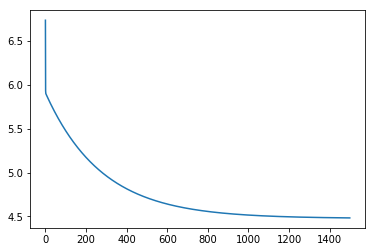

In [10]:
plt.plot(cost_history)

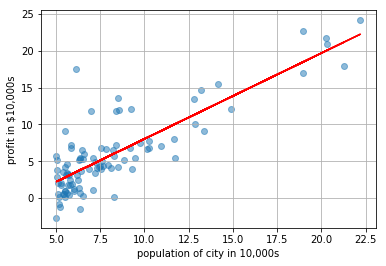

In [11]:
plot_data(raw_X, y)
plt.plot(raw_X, np.dot(X, theta), c='r')

In [12]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [13]:
cost_vals = np.zeros(
    (theta0_vals.shape[0],
    theta1_vals.shape[0])
)

In [14]:
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        cost_vals[i, j] = compute_cost(X, y, t)

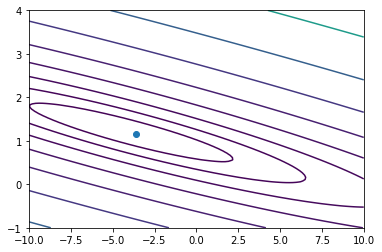

In [15]:
plt.contour(
    theta0_vals, theta1_vals, cost_vals.T,
    np.logspace(-2, 3, 20)
)
plt.scatter(theta[0], theta[1])